# Tipsbet Analysis


## Initialisation

In [129]:
from tips import Tips
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [139]:
plt.style.use('seaborn-bright')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Load Data
The Tips module loads data all the data between the given start and end dates (both default to today if not given)

In [34]:
start = dt.datetime.now() - dt.timedelta(days=1000)
t = Tips(start)
t.df.Time.min()

Timestamp('2017-10-27 12:30:00.756813')

## Analysis

In [36]:
print(t.df.Time.dt.date.min(), '-', t.df.Time.dt.date.max())
print(t.df.Status.value_counts().to_string() + '\n')
print((t.df.Status.value_counts(normalize=True).round(4) * 100).to_string())

2017-10-27 - 2020-07-23
 W    9385
 L    3437
 ?      17

 W    73.10
 L    26.77
 ?     0.13


In [41]:
print(t.df.groupby('Sport').Status.value_counts().to_string())
print((t.df.groupby('Sport').Status.value_counts(normalize=True).round(4) * 100).to_string())

Sport       Status
Basketball   W         526
             L         224
             ?           2
Football     W        8011
             L        2865
             ?          14
Tennis       W         848
             L         348
             ?           1
Sport       Status
Basketball   W        69.95
             L        29.79
             ?         0.27
Football     W        73.56
             L        26.31
             ?         0.13
Tennis       W        70.84
             L        29.07
             ?         0.08


In [48]:
t.df[t.df.Odds <= 1.3].Status.value_counts(normalize=True).round(4) * 100

 W    78.19
 L    21.72
 ?     0.09
Name: Status, dtype: float64

### Plotting
Plot a bar chart of the results for a particular column

In [147]:
def plot_status(by='Sport'):
    summary = t.df[[by, 'Status']]
    order = ['W', 'L', '?']

    sm = summary.groupby([by, 'Status']).size().unstack().fillna(0)
    # sm.columns = 

    sm.columns = pd.CategoricalIndex(np.vectorize(str.strip)(sm.columns.values), ordered=True)
    sm.columns = sm.columns.reorder_categories(new_categories=order)
    sm = sm.sort_index(axis=1)

    sm.plot(kind='bar', stacked=True, figsize=(14, 10))
# t.df.plot.bar(x='Odds',y='Status')

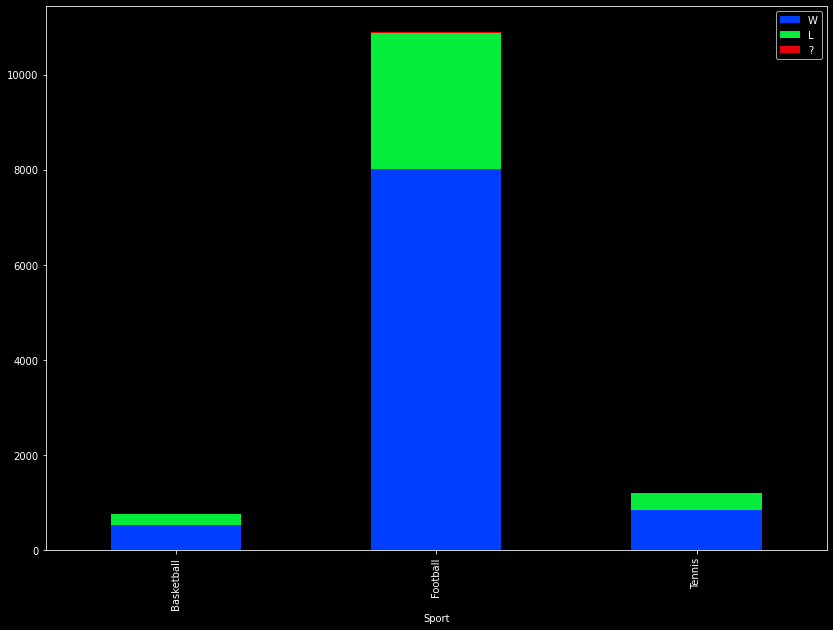

In [151]:
plot_status()

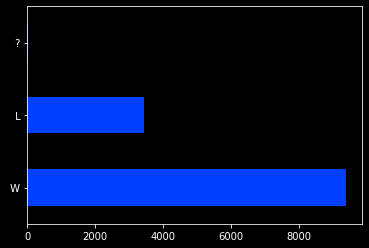

In [152]:
t.df.Status.value_counts().plot(kind='barh')